In [1]:
import tensorflow as tf
import imageio
import os
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
tr = pd.read_csv('Ytr.txt')
te = pd.read_csv('pred.txt')

In [22]:
Xt = np.zeros([1,200,200])
teId = tr['id'][0]
path = 'images/%05d.png' %teId
pic = imageio.imread(path)
pic = Image.fromarray(pic).resize((200,200))
#pic = np.mean(pic, axis = 2)
pic1 = np.array(pic)

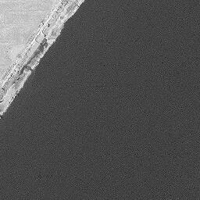

In [23]:
pic

In [24]:
pic1.shape

(200, 200, 3)

In [ ]:
import albumentations as A

In [25]:
def read_image(N,D,X):
    Xt = np.zeros([N,D,D,3])
    #found = list()
    for ii in range(N):
        #if ii % 100 == 0:
            #print('%d / %d' % (ii, N))
        teId = X['id'][ii]
        path = 'images/%05d.png' %teId
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((D,D)) # NOTE : this can be improved.
        # pic = np.mean(pic,axis = 2) # NOTE: this can be improved
        pic = np.array(pic)
        # print(pic.shape)
        Xt[ii,:,:,:] = pic
    Xt = Xt/255
    return Xt

In [26]:
Xtr_1 = read_image(tr.shape[0],200,tr)

In [29]:
# Xtr_1

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # output neuron for number of classes
])

In [31]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [32]:
Xtr_2 = Xtr_1.reshape(-3,200,200,3)

In [33]:
model.fit(Xtr_2,np.array(tr['label']), epochs = 30)

Epoch 1/30
114/114 [==============================] - 8s 17ms/step - loss: 0.8018 - accuracy: 0.6021
Epoch 2/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6931 - accuracy: 0.6181 0s - loss: 0.7000 - accu
Epoch 3/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6586 - accuracy: 0.6225
Epoch 4/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6434 - accuracy: 0.6398
Epoch 5/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6212 - accuracy: 0.6541
Epoch 6/30
114/114 [==============================] - 2s 16ms/step - loss: 0.6014 - accuracy: 0.6747
Epoch 7/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5878 - accuracy: 0.6929
Epoch 8/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5643 - accuracy: 0.7047
Epoch 9/30
114/114 [==============================] - 2s 16ms/step - loss: 0.5180 - accuracy: 0.7411
Epoch 10/30
114/114 [==============================] - 2s 16ms/ste

In [34]:
Xte_1 = read_image(te.shape[0],200,te)
Xte_2 = Xte_1.reshape(-3,200,200,3)

In [35]:
pred = model.predict(Xte_2)

In [36]:
te1 = te.copy()

In [37]:
te1['score'] = pred

In [38]:
te1.to_csv('pred5.csv',index = False)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # output neuron for number of classes
])

In [40]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [44]:
model.fit(Xtr_2,np.array(tr['label']), epochs = 75)

Epoch 1/75
114/114 [==============================] - 3s 20ms/step - loss: 0.4200 - accuracy: 0.8214 0s - loss: 0.4212 - accuracy: 
Epoch 2/75
114/114 [==============================] - 2s 20ms/step - loss: 0.4031 - accuracy: 0.8376
Epoch 3/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3995 - accuracy: 0.8429
Epoch 4/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3894 - accuracy: 0.8500
Epoch 5/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3426 - accuracy: 0.8676
Epoch 6/75
114/114 [==============================] - 2s 20ms/step - loss: 0.3087 - accuracy: 0.8742
Epoch 7/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2915 - accuracy: 0.8897
Epoch 8/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2966 - accuracy: 0.8941
Epoch 9/75
114/114 [==============================] - 2s 20ms/step - loss: 0.2703 - accuracy: 0.9040
Epoch 10/75
114/114 [==============================] - 2s 20

In [45]:
pred = model.predict(Xte_2)

In [46]:
te1 = te.copy()
te1['score'] = pred
te1.to_csv('pred6.csv',index = False)